# Shengnan's raw data and raw plots

In [2]:
import numpy as np
# import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:

x = np.loadtxt('x8.txt')
y = np.loadtxt('y2.txt')
#x1 = np.loadtxt('/Users/snz/Downloads/Cambridge/Absorption spec/x9.txt')
y1 = np.loadtxt('y1.txt')

x4 = np.loadtxt('x4.txt') 
yy = np.loadtxt('yy.txt') 

In [4]:
def lorentzian(x, x0, gamma, A, d):
    return A * gamma / (gamma**2 + (x - x0)**2) + d

In [5]:
segments = [
    {'range': (13, 19), 'p0': [18.0, 2.0, 20.0,  np.median(y)]},  # 峰1
    {'range': (27, 35), 'p0': [29.5, 1.5, 23.0, np.median(y)]},  # 峰2
    {'range': (37, 42), 'p0': [39.5, 1.5, 23.0, np.median(y)]},  # 峰3
]


In [6]:
results = []

In [7]:
for idx, seg in enumerate(segments, 1):
    lo, hi = seg['range']
    mask = (x >= lo) & (x <= hi)
    x_seg = x[mask]
    y_seg = y[mask]
    
    popt, pcov = curve_fit(lorentzian, x_seg, y_seg, p0=seg['p0'])
    perr = np.sqrt(np.diag(pcov))
    results.append((x_seg, popt, perr))
    
    # 打印拟合结果
    x0_fit, gamma_fit, A_fit, d_fit = popt
    x0_err, gamma_err, A_err, d_err = perr
    print(f"Peak {idx} （{lo}≤x≤{hi}）：")
    print(f"  x0 = {x0_fit:.3f} ± {x0_err:.3f}")
    print(f"  γ  = {gamma_fit:.3f} ± {gamma_err:.3f}")
    print(f"  A  = {A_fit:.2f} ± {A_err:.2f}")
    print(f"  d  = {d_fit:.2f} ± {d_err:.2f}")
    print('-'*40)

Peak 1 （13≤x≤19）：
  x0 = 17.927 ± 0.002
  γ  = 1.237 ± 0.004
  A  = -32.47 ± 0.11
  d  = 41.47 ± 0.03
----------------------------------------
Peak 2 （27≤x≤35）：
  x0 = 29.554 ± 0.002
  γ  = 1.318 ± 0.004
  A  = -32.33 ± 0.11
  d  = 40.75 ± 0.03
----------------------------------------
Peak 3 （37≤x≤42）：
  x0 = 39.723 ± 0.001
  γ  = 1.009 ± 0.004
  A  = -22.80 ± 0.12
  d  = 42.87 ± 0.05
----------------------------------------


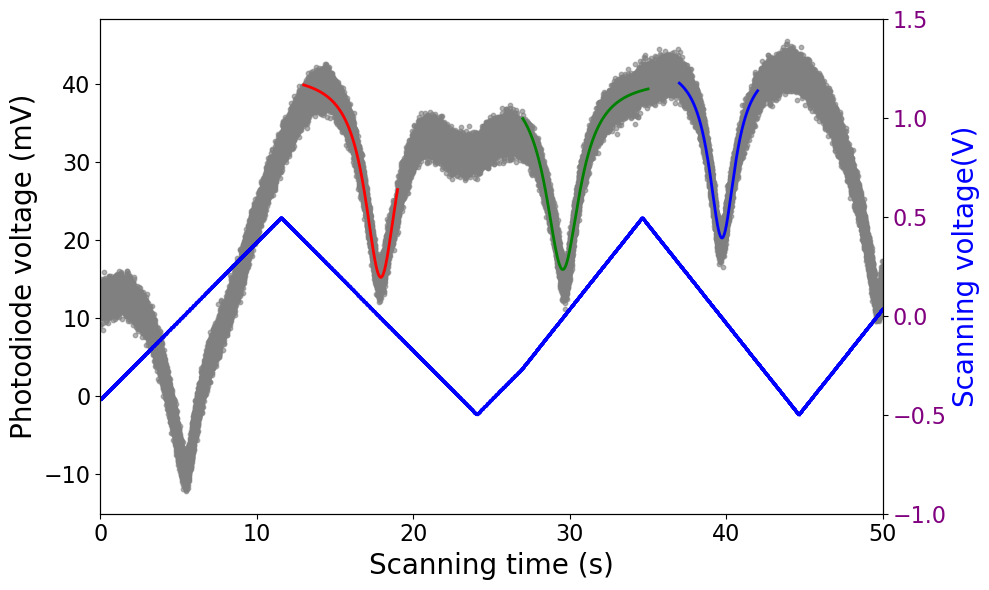

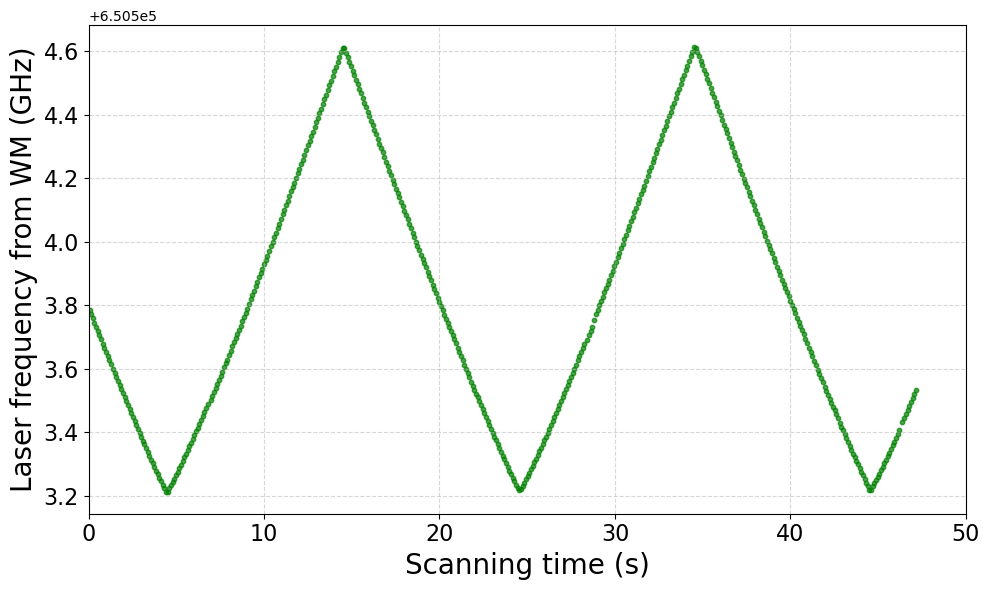

In [31]:
fig, ax1 = plt.subplots(figsize=(10,6))
label_fontsize = 20
tick_fontsize = 16 
ax1.scatter(x, y, s=10, color='gray', alpha=0.6, label='原始数据 (x,y)')
colors = ['r','g','b']
for i, (x_seg, popt, _) in enumerate(results):
    y_fit = lorentzian(x_seg, *popt)
    ax1.plot(x_seg, y_fit, '-', color=colors[i], lw=2,
             label=f'Peak {i+1} 拟合 ({segments[i]["range"][0]}–{segments[i]["range"][1]})')
ax1.set_xlabel('Scanning time (s)',fontsize=label_fontsize)
ax1.set_ylabel('Photodiode voltage (mV)', color='black',fontsize=label_fontsize)
ax1.tick_params(axis='y', labelcolor='black',labelsize=tick_fontsize)
ax1.tick_params(axis='x', labelcolor='black',labelsize=tick_fontsize)
ax1.set_xlim(0, 50)

ax2 = ax1.twinx()
ax2.scatter(x, y1, s=2, color='blue', alpha=0.1, marker='x', 
           label='附加数据 (x,y1)', linewidths=1)
ax2.set_ylabel('Scanning voltage(V)', color='blue',fontsize=label_fontsize)
ax2.tick_params(axis='y', labelcolor='purple',labelsize=tick_fontsize)
ax2.set_ylim(-1, 1.5) 

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.tight_layout()

plt.figure(figsize=(10,6))
plt.scatter(x4, yy, s=10, color='green', alpha=0.7, label='附件数据 (x4, yy)')
plt.xlabel('Scanning time (s)', fontsize=label_fontsize)
plt.ylabel('Laser frequency from WM (GHz)', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xlim(0, 50)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. 加载数据
x = np.loadtxt('/Users/snz/Downloads/Cambridge/Absorption spec/x8.txt')
y = np.loadtxt('/Users/snz/Downloads/Cambridge/Absorption spec/y2.txt')
#x1 = np.loadtxt('/Users/snz/Downloads/Cambridge/Absorption spec/x9.txt')
y1 = np.loadtxt('/Users/snz/Downloads/Cambridge/Absorption spec/y1.txt')
# 新增附件数据
x4 = np.loadtxt('/Users/snz/Downloads/Cambridge/Absorption spec/x4.txt')  # 确保路径正确
yy = np.loadtxt('/Users/snz/Downloads/Cambridge/Absorption spec/yy.txt')   # 确保路径正确

# 2. 定义带背景的单峰洛伦兹函数
def lorentzian(x, x0, gamma, A, d):
    return A * gamma / (gamma**2 + (x - x0)**2) + d

# 3. 各峰的区间和初始猜测
segments = [
    {'range': (13, 19), 'p0': [18.0, 2.0, 20.0,  np.median(y)]},  # 峰1
    {'range': (27, 35), 'p0': [29.5, 1.5, 23.0, np.median(y)]},  # 峰2
    {'range': (37, 42), 'p0': [39.5, 1.5, 23.0, np.median(y)]},  # 峰3
]

results = []

# 4. 对每个区间分别拟合
for idx, seg in enumerate(segments, 1):
    lo, hi = seg['range']
    mask = (x >= lo) & (x <= hi)
    x_seg = x[mask]
    y_seg = y[mask]
    
    popt, pcov = curve_fit(lorentzian, x_seg, y_seg, p0=seg['p0'])
    perr = np.sqrt(np.diag(pcov))
    results.append((x_seg, popt, perr))
    
    # 打印拟合结果
    x0_fit, gamma_fit, A_fit, d_fit = popt
    x0_err, gamma_err, A_err, d_err = perr
    print(f"Peak {idx} （{lo}≤x≤{hi}）：")
    print(f"  x0 = {x0_fit:.3f} ± {x0_err:.3f}")
    print(f"  γ  = {gamma_fit:.3f} ± {gamma_err:.3f}")
    print(f"  A  = {A_fit:.2f} ± {A_err:.2f}")
    print(f"  d  = {d_fit:.2f} ± {d_err:.2f}")
    print('-'*40)

# ... 前面的加载数据和拟合代码保持不变 ...

# ... 前面的加载数据和拟合代码保持不变 ...

# 5. 创建双Y轴图
fig, ax1 = plt.subplots(figsize=(10,6))
label_fontsize = 20    # 坐标轴标签字体大小
tick_fontsize = 16 
# 第一个Y轴（左侧）- 原始数据和拟合曲线
ax1.scatter(x, y, s=10, color='gray', alpha=0.6, label='原始数据 (x,y)')
colors = ['r','g','b']
for i, (x_seg, popt, _) in enumerate(results):
    y_fit = lorentzian(x_seg, *popt)
    ax1.plot(x_seg, y_fit, '-', color=colors[i], lw=2,
             label=f'Peak {i+1} 拟合 ({segments[i]["range"][0]}–{segments[i]["range"][1]})')
ax1.set_xlabel('Scanning time (s)',fontsize=label_fontsize)
ax1.set_ylabel('Photodiode voltage (mV)', color='black',fontsize=label_fontsize)
ax1.tick_params(axis='y', labelcolor='black',labelsize=tick_fontsize)
ax1.tick_params(axis='x', labelcolor='black',labelsize=tick_fontsize)
# 第二个Y轴（右侧）- 附加数据
ax2 = ax1.twinx()
ax2.scatter(x, y1, s=2, color='blue', alpha=0.1, marker='x', 
           label='附加数据 (x,y1)', linewidths=1)
ax2.set_ylabel('Scanning voltage(V)', color='blue',fontsize=label_fontsize)
ax2.tick_params(axis='y', labelcolor='purple',labelsize=tick_fontsize)
ax2.set_ylim(-1, 1.5)  # 替换为你需要的数值

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

#plt.title('双Y轴数据对比')
plt.tight_layout()

plt.figure(figsize=(10,6))  # 新建一个画布
plt.scatter(x4, yy, s=10, color='green', alpha=0.7, label='附件数据 (x4, yy)')
plt.xlabel('Scanning time (s)', fontsize=label_fontsize)
plt.ylabel('Laser frequency from WM (GHz)', fontsize=label_fontsize)
#plt.title('附件数据单独图', fontsize=18)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
#plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


# 250516 - My turn to reproduce the plot and deduce the resonant frequency

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

photodiode_time = np.loadtxt('x8.txt')
photodiode_fluorescence = np.loadtxt('y2.txt')
#x1 = np.loadtxt('/Users/snz/Downloads/Cambridge/Absorption spec/x9.txt')
photodiode_voltagescan = np.loadtxt('y1.txt')

wm_time = np.loadtxt('x4.txt') 
wm_frequency = np.loadtxt('yy.txt') 

In [ ]:
import matplotlib
matplotlib.use('TkAgg')  # Set the interactive backend
import matplotlib.pyplot as plt

## Inspect raw data

In [17]:
# inspect the raw data first

plt.figure(figsize=(12,6))
plt.plot(photodiode_time, photodiode_fluorescence, 'o', markersize=1, color='gray', alpha=0.5)
plt.plot(photodiode_time, photodiode_voltagescan*10, 'o', markersize=1, color='blue', alpha=0.5)
plt.plot(wm_time, (wm_frequency-650503)*10, 'o', markersize=1, color='green', alpha=0.5)
plt.show()


## Lorentzian fits

#### First fit

In [55]:
# Select the fitting range
fit_lo, fit_hi = 27, 32
mask = (photodiode_time >= fit_lo) & (photodiode_time <= fit_hi)
x_fit = photodiode_time[mask]
y_fit = photodiode_fluorescence[mask]

# Lorentzian function
def lorentzian(x, x0, gamma, A, d):
    return -A * gamma**2 / (gamma**2 + (x - x0)**2) + d

# Initial guess: [center, width, amplitude, offset]
p0 = [x_fit[np.argmin(y_fit)], 2, np.max(y_fit) - np.min(y_fit), np.median(y_fit)]

# Fit
popt, pcov = curve_fit(lorentzian, x_fit, y_fit, p0=p0)
perr = np.sqrt(np.diag(pcov))

# Print fit results
x0_fit, gamma_fit, A_fit, d_fit = popt
x0_err, gamma_err, A_err, d_err = perr
print(f"Fit results for t=({fit_lo},{fit_hi}):")
print(f"  x0 = {x0_fit:.5f} ± {x0_err:.5f}")
print(f"  γ  = {gamma_fit:.5f} ± {gamma_err:.5f}")
print(f"  A  = {A_fit:.5f} ± {A_err:.5f}")
print(f"  d  = {d_fit:.5f} ± {d_err:.5f}")

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x_fit, y_fit, s=10, color='gray', label='Data')
plt.plot(x_fit, lorentzian(x_fit, *popt), 'r-', lw=2, label='Lorentzian fit')
plt.xlabel('Time (s)')
plt.ylabel('Photodiode fluorescence')
plt.legend()
plt.show()

Fit results for t=(27,32):
  x0 = 29.57733 ± 0.00155
  γ  = 1.01937 ± 0.00505
  A  = 21.67518 ± 0.05230
  d  = 37.02601 ± 0.05470


#### Second fit

In [85]:
# Select the fitting range for 37–42
fit_lo2, fit_hi2 = 36, 40.0
mask2 = (photodiode_time >= fit_lo2) & (photodiode_time <= fit_hi2)
x_fit2 = photodiode_time[mask2]
y_fit2 = photodiode_fluorescence[mask2]

# Lorentzian function already defined above

# Initial guess: [center, width, amplitude, offset]
p0_2 = [x_fit2[np.argmin(y_fit2)]-0.2 , 2, np.max(y_fit2) - np.min(y_fit2)-5, np.median(y_fit2)]

# Fit
weights = 1 / (1 + (x_fit2 - x_fit2[np.argmin(y_fit2)])**2)
popt2, pcov2 = curve_fit(lorentzian, x_fit2, y_fit2, p0=p0_2, sigma=weights)

# popt2, pcov2 = curve_fit(lorentzian, x_fit2, y_fit2, p0=p0_2)
perr2 = np.sqrt(np.diag(pcov2))

# Print fit results
x0_fit2, gamma_fit2, A_fit2, d_fit2 = popt2
x0_err2, gamma_err2, A_err2, d_err2 = perr2
print(f"Fit results for t=({fit_lo2},{fit_hi2}):")
print(f"  x0 = {x0_fit2:.5f} ± {x0_err2:.5f}")
print(f"  γ  = {gamma_fit2:.5f} ± {gamma_err2:.5f}")
print(f"  A  = {A_fit2:.5f} ± {A_err2:.5f}")
print(f"  d  = {d_fit2:.5f} ± {d_err2:.5f}")

fit_lo2, fit_hi2 = 36, 42
mask2 = (photodiode_time >= fit_lo2) & (photodiode_time <= fit_hi2)
x_fit2 = photodiode_time[mask2]
y_fit2 = photodiode_fluorescence[mask2]

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x_fit2, y_fit2, s=10, color='gray', label='Data')
plt.plot(x_fit2, lorentzian(x_fit2, *popt2), 'b-', lw=2, label='Lorentzian fit')
plt.xlabel('Time (s)')
plt.ylabel('Photodiode fluorescence')
plt.legend()
plt.show()

Fit results for t=(36,40.0):
  x0 = 39.62040 ± 0.01084
  γ  = 0.83416 ± 0.01047
  A  = 22.91956 ± 0.18541
  d  = 42.56525 ± 0.03346


In [86]:
# Plot everything together

plt.figure(figsize=(12,6))
plt.plot(photodiode_time, photodiode_fluorescence, 'o', markersize=1, color='gray', alpha=0.5)
# plt.plot(photodiode_time, photodiode_voltagescan*10, 'o', markersize=1, color='blue', alpha=0.5)
plt.plot(wm_time, (wm_frequency-650503)*20, 'o', markersize=1, color='green', alpha=1)

# plot the lorentzian fit
plt.plot(x_fit, lorentzian(x_fit, *popt), 'r-', lw=2, label='Lorentzian fit')
plt.plot(x_fit2, lorentzian(x_fit2, *popt2), 'b-', lw=2, label='Lorentzian fit 2')

plt.xlabel('Time (s)')
plt.ylabel('Photodiode fluorescence')
plt.legend()

plt.xlim(23,46)
plt.show()

## Translate to frequency

In [87]:
plt.plot(wm_time, wm_frequency, 'o', markersize=3, color='green', alpha=0.5)
plt.plot(wm_time[361], wm_frequency[361], 'o', markersize=5, color='red', alpha=1)
plt.plot(wm_time[257], wm_frequency[257], 'o', markersize=5, color='blue', alpha=1)
plt.plot(wm_time[466], wm_frequency[466], 'o', markersize=5, color='purple', alpha=1)
# fit linear lines for triangular scan data

range1 = 257+40
range2 = 361-40
range3 = 361+40
range4 = 466-40

def linear(x, m, b):
    return m * x + b
# Fit the data
popt3, pcov3 = curve_fit(linear, wm_time[range1:range2], wm_frequency[range1:range2])
perr3 = np.sqrt(np.diag(pcov3))
m_fit3, b_fit3 = popt3
m_err3, b_err3 = perr3
# Plot the fitted line
plt.plot(wm_time[range1:range2], linear(wm_time[range1:range2], *popt3), 'r-', lw=1, alpha=0.5,label='Linear fit')
plt.xlabel('Time (s)')
plt.ylabel('Laser frequency from WM (GHz)')

# Now fit the data for another segment
popt4, pcov4 = curve_fit(linear, wm_time[range3:range4], wm_frequency[range3:range4])
perr4 = np.sqrt(np.diag(pcov4))
m_fit4, b_fit4 = popt4
m_err4, b_err4 = perr4
# Plot the fitted line
plt.plot(wm_time[range3:range4], linear(wm_time[range3:range4], *popt4), 'b-', lw=1, alpha=0.5, label='Linear fit')

# plot
plt.plot(x0_fit, linear(x0_fit, *popt3), '^', markersize=2, color='red', alpha=1)
plt.plot(x0_fit2, linear(x0_fit2, *popt4), '^', markersize=2, color='blue', alpha=1)

# Print the fit results
print(f"Fit results for segment 1:")
print(f"  m = {m_fit3:.5f} ± {m_err3:.5f}")
print(f"  b = {b_fit3:.5f} ± {b_err3:.5f}")
print(f"Fit results for segment 2:")
print(f"  m = {m_fit4:.5f} ± {m_err4:.5f}")
print(f"  b = {b_fit4:.5f} ± {b_err4:.5f}")
print("")

# Print resonant frequency
print(f" First x0 = {x0_fit:.5f} ± {x0_err:.5f}")
print(f" The first resonant frequency is {linear(x0_fit,*popt3)/1000:.8f} THz")
print(f" Second x0 = {x0_fit2:.5f} ± {x0_err2:.5f}")
print(f" The second resonant frequency is {linear(x0_fit2,*popt4)/1000:.8f} THz")

# Plot horizontal and vertical lines at the resonant points
plt.axvline(x0_fit, color='red', linestyle='--', lw=1, alpha=0.7)
plt.axhline(linear(x0_fit, *popt3), color='red', linestyle='--', lw=1, alpha=0.7)
plt.axvline(x0_fit2, color='blue', linestyle='--', lw=1, alpha=0.7)
plt.axhline(linear(x0_fit2, *popt4), color='blue', linestyle='--', lw=1, alpha=0.7)

plt.legend()
plt.show()

Fit results for segment 1:
  m = 0.14927 ± 0.00080
  b = 650499.45139 ± 0.02355
Fit results for segment 2:
  m = -0.14316 ± 0.00028
  b = 650509.53980 ± 0.01116

 First x0 = 29.57733 ± 0.00155
 The first resonant frequency is 650.50386639 THz
 Second x0 = 39.62040 ± 0.01084
 The second resonant frequency is 650.50386773 THz


#### Find uncertainty of fits

In [227]:
# Find frequency at x0

frequency = linear(x0_fit,m_fit3,b_fit3)
frequency/1000 # THz

650.5038726488738

In [228]:
# find the uncertainty of the frequency

frequency_uncertainty = x0_err * m_fit3
frequency_uncertainty/1000*1e6 # MHz

0.22419260066704963

In [229]:
# # fine the uncertainty in quadrature

# frequency_uncertainty2 = np.sqrt(frequency_uncertainty**2 + b_err3**2)
# frequency_uncertainty2/1000*1e6 # MHz

In [230]:
# print out in full

print(f" The first resonant frequency is {linear(x0_fit,popt3[0],popt3[1])/1000:.6f} THz ± {frequency_uncertainty/1000:.8f} THz")

 The first resonant frequency is 650.503873 THz ± 0.00000022 THz


In [231]:
# Find frequency at x0

frequency = linear(x0_fit2,m_fit4,b_fit4)
frequency/1000 # THz

650.5038593410757

In [232]:
# find the uncertainty of the frequency

frequency_uncertainty = x0_err2 * m_fit4
frequency_uncertainty/1000*1e6 # MHz

-0.19124569358695034

In [217]:
# # find the uncertainty of the frequency in quadrature

# frequency_uncertainty = np.sqrt((x0_err2 * m_fit4)**2 + (m_err4 * x0_fit2)**2)
# frequency_uncertainty/1000*1e6 # MHz

In [233]:
# print out in full

print(f" The second resonant frequency is {linear(x0_fit2,popt4[0],popt4[1])/1000:.6f} THz ± {np.abs(frequency_uncertainty/1000):.8f} THz")

 The second resonant frequency is 650.503859 THz ± 0.00000019 THz


# Combine everything together

(23.0, 46.0)

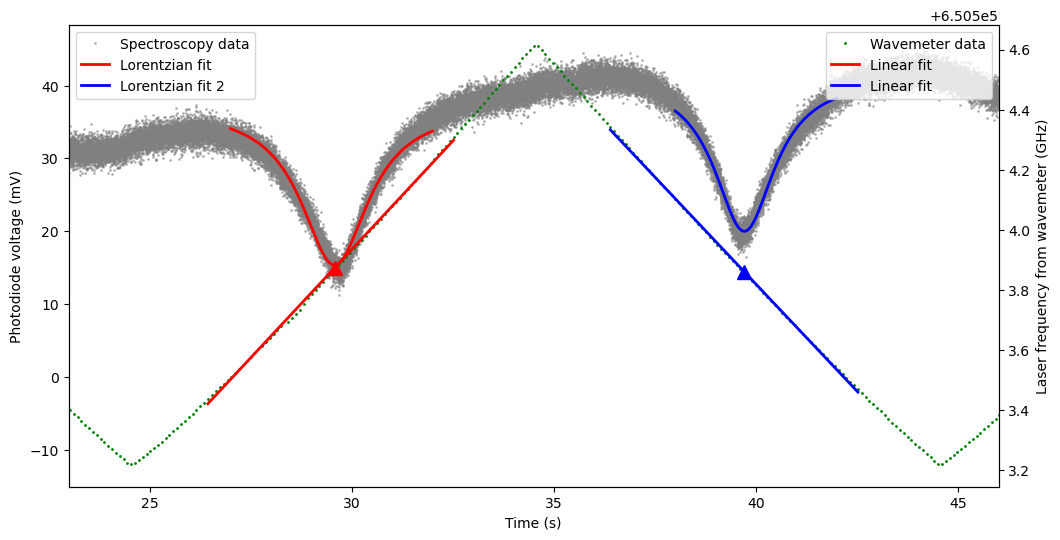

In [226]:
# Plot everything together

fig, ax1 = plt.subplots(figsize=(12,6))

#plot the lorenztian fit of the photodiode spectroscopy data
ax1.plot(photodiode_time, photodiode_fluorescence, 'o', markersize=1, color='gray', alpha=0.5, label='Spectroscopy data')
# plt.plot(photodiode_time, photodiode_voltagescan*10, 'o', markersize=1, color='blue', alpha=0.5)
ax1.plot(x_fit, lorentzian(x_fit, *popt), 'r-', lw=2, label='Lorentzian fit')
ax1.plot(x_fit2, lorentzian(x_fit2, *popt2), 'b-', lw=2, label='Lorentzian fit 2')
ax1.legend()

# plot the lienar fit of wm data
ax2= ax1.twinx()
ax2.plot(wm_time, wm_frequency, 'o', markersize=1, color='green', alpha=1, label='Wavemeter data')
ax2.plot(wm_time[range1:range2], linear(wm_time[range1:range2], *popt3), 'r-', lw=2, label='Linear fit')
ax2.plot(wm_time[range3:range4], linear(wm_time[range3:range4], *popt4), 'b-', lw=2, label='Linear fit')
ax2.plot(x0_fit, linear(x0_fit, *popt3), '^', markersize=10, color='red', alpha=1)
ax2.plot(x0_fit2, linear(x0_fit2, *popt4), '^', markersize=10, color='blue', alpha=1)
# ax2.axhline(y=linear(x0_fit, *popt3), color='red', linestyle='--', lw=1)
# ax2.axhline(y=linear(x0_fit2, *popt4), color='blue', linestyle='--', lw=1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Photodiode voltage (mV)')
ax2.set_ylabel('Laser frequency from wavemeter (GHz)')

ax2.legend()
plt.xlim(23,46)

# Now plot everything in nice latex for thesis

In [319]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,6)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

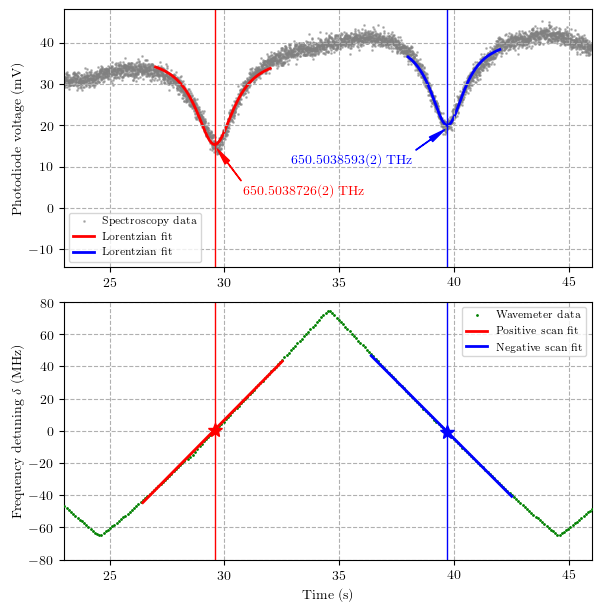

In [ ]:
# Plot everything together

fig, axs = plt.subplots(2,1)

ax1 = axs[1]
ax2 = axs[0]

#plot the lorenztian fit of the photodiode spectroscopy data
ax2.plot(photodiode_time[::10], photodiode_fluorescence[::10], 'o', markersize=1, color='gray', alpha=0.5, label='Spectroscopy data',zorder=1) # plot every 10th point to reduce clutter and for overleaf to load faster
# plt.plot(photodiode_time, photodiode_voltagescan*10, 'o', markersize=1, color='blue', alpha=0.5)
ax2.plot(x_fit, lorentzian(x_fit, *popt), 'r-', lw=2, label='Lorentzian fit',zorder=1)
ax2.plot(x_fit2, lorentzian(x_fit2, *popt2), 'b-', lw=2, label='Lorentzian fit',zorder=1)
ax2.axvline(x0_fit, color='red', linestyle='-', lw=1)
ax2.axvline(x0_fit2, color='blue', linestyle='-', lw=1)
ax2.legend(loc='lower left')
ax2.set_ylabel('Photodiode voltage (mV)')
ax2.set_xlim(23,46)

# Annotate the Lorentzian peak positions with arrows and text
ax2.annotate(
    r'%.7f(%d) THz' % (linear(x0_fit, *popt3)/1000, x0_err * m_fit3/1000*1e7),
    xy=(x0_fit+0.1, lorentzian(x0_fit, *popt)-1), 
    xytext=(x0_fit+1.25, lorentzian(x0_fit, *popt)-12),
    arrowprops=dict(facecolor='red',edgecolor = 'red',shrink=0.01, width=0.25, headwidth=4),
    color='red',
    ha='left'
)

ax2.annotate(
    r'%.7f(%d) THz' % (linear(x0_fit2, *popt4)/1000, np.round(abs(x0_err2 * m_fit4/1000*1e7))), 
    xy=(x0_fit2-0.1, lorentzian(x0_fit2, *popt2)-1), 
    xytext=(x0_fit2-1.5, lorentzian(x0_fit2, *popt2)-9),
    arrowprops=dict(facecolor='blue',edgecolor = 'blue',shrink=0.01, width=0.25, headwidth=4),
    color='blue',
    ha='right'
)

f1 = linear(x0_fit, *popt3)
f2 = linear(x0_fit2, *popt4)
f1_err = x0_err * m_fit3
f2_err = np.abs(x0_err2 * m_fit4)
f_mean = (f1 + f2)/2
f_mean_err = np.sqrt(f1_err**2 + f2_err**2)/2

# plot the lienar fit of wm data
ax1.plot(wm_time, (wm_frequency-f_mean)*100, 'o', markersize=1, color='green', alpha=1, label='Wavemeter data',zorder=3)
ax1.plot(wm_time[range1:range2], (linear(wm_time[range1:range2], *popt3)-f_mean)*100, 'r-', lw=2, label='Positive scan fit',zorder=3)
ax1.plot(wm_time[range3:range4], (linear(wm_time[range3:range4], *popt4)-f_mean)*100, 'b-', lw=2, label='Negative scan fit',zorder=3)
ax1.plot(x0_fit, (linear(x0_fit, *popt3)-f_mean)*100, '*', markersize=10, color='red', alpha=1,zorder=3)
ax1.plot(x0_fit2, (linear(x0_fit2, *popt4)-f_mean)*100, '*', markersize=10, color='blue', alpha=1,zorder=3)
# ax1.axhline(y=linear(x0_fit, *popt3), color='red', linestyle='--', lw=1)
# ax1.axhline(y=linear(x0_fit2, *popt4), color='blue', linestyle='--', lw=1)
ax1.set_ylabel(r'Frequency detuning $\delta$ (MHz)')
ax1.set_xlabel('Time (s)')
ax1.legend()
ax1.set_xlim(23,46)
ax1.axvline(x0_fit, color='red', linestyle='-', lw=1)
ax1.axvline(x0_fit2, color='blue', linestyle='-', lw=1)
ax1.set_ylim(-80,80)

plt.savefig("250516 SAS.pdf",dpi=300)

In [304]:
 np.round(abs(x0_err2 * m_fit4/1000*1e7))

2.0

In [315]:
f1 = linear(x0_fit, *popt3)/1000
f2 = linear(x0_fit2, *popt4)/1000
f1_err = x0_err * m_fit3/1000
f2_err = np.abs(x0_err2 * m_fit4)/1000

f_mean = (f1 + f2)/2
f_mean_err = np.sqrt(f1_err**2 + f2_err**2)/2
print(f" The mean resonant frequency is {f_mean:.8f} THz ± {f_mean_err:.8f} THz")

 The mean resonant frequency is 650.50386599 THz ± 0.00000015 THz


In [318]:
f_mean_err*1e6

0.1473407933240222